In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Описание данных

[Ссылка на данные](https://drive.google.com/file/d/1rIfaOvLXQIOfTXQn-QUwNAijECpOmN1j/view)

In [8]:
df = pd.read_csv("C:/Users/uncle/Documents/GitHub/Lenta.Ru-News-Dataset/lenta-ru-news-with-2022.csv", low_memory=False)
df

,date,url,topic,tags,title,text
0,1914/09/16,https://lenta.ru/news/1914/09/16/hungarnn/,Библиотека,Первая мировая,1914. Русские войска вступили в пределы Венгрии,Бои у Сопоцкина и Друскеник закончились отступ...
1,1914/09/16,https://lenta.ru/news/1914/09/16/lermontov/,Библиотека,Первая мировая,1914. Празднование столетия М.Ю. Лермонтова от...,"Министерство народного просвещения, в виду про..."
2,1914/09/17,https://lenta.ru/news/1914/09/17/nesteroff/,Библиотека,Первая мировая,1914. Das ist Nesteroff!,"Штабс-капитан П. Н. Нестеров на днях, увидев в..."
3,1914/09/17,https://lenta.ru/news/1914/09/17/bulldogn/,Библиотека,Первая мировая,1914. Бульдог-гонец под Льежем,Фотограф-корреспондент Daily Mirror рассказыва...
4,1914/09/18,https://lenta.ru/news/1914/09/18/zver/,Библиотека,Первая мировая,1914. Под Люблином пойман швабский зверь,"Лица, приехавшие в Варшаву из Люблина, передаю..."
...,...,...,...,...,...,...
1156513,2022/11/18,https://lenta.ru/news/2022/11/18/bezhh/,Мир,Общество,Беженца из Украины избили после спора о нацистах,Беженца из Украины избили в городе Кейзер амер...
1156514,2022/11/18,https://lenta.ru/news/2022/11/18/nurmagomedov/,Спорт,Бокс и ММА,Брат Нурмагомедова назвал цель выступления в B...,"Российский боец смешанного стиля (ММА), двоюро..."
1156515,2022/11/18,https://lenta.ru/news/2022/11/18/bioprint/,Наука и техника,Будущее,Разработана технология печати ткани для трансп...,Ученые Израильского технологического института...
1156516,2022/11/18,https://lenta.ru/news/2022/11/18/penni/,Мир,Политика,Республиканцы в Конгрессе потребовали проверит...,Республиканцы в Палате представителей конгресс...


## Общие описательные характеристики

In [9]:
df.shape

(1156518, 6)

В нашем датасете 1156518 строк и 6 колонок:

`url` - ссылка на новость  
`title` - название статьи  
`text` - текст статьи  
`topic` - тема статьи  
`tags` - "подтема" статьи (более узкая, чем предыдущая колонка)  
`date` - дата публикации статьи

Рассмотрим каждую колонку подробнее

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156518 entries, 0 to 1156517
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   date    1156518 non-null  object
 1   url     1156518 non-null  object
 2   topic   1154011 non-null  object
 3   tags    1122828 non-null  object
 4   title   1155591 non-null  object
 5   text    1155614 non-null  object
dtypes: object(6)
memory usage: 52.9+ MB


In [11]:
display(df.isna().sum())

date         0
url          0
topic     2507
tags     33690
title      927
text       904
dtype: int64

Поскольку изучаемые нами данные - текст, тип данных у всех колонок - object. Однако в последней колонке у нас представлены даты, поэтому необходимо будет их преобразовать отдельно

Также в данных есть пропуски.

In [12]:
df.describe(include=['object'])

,date,url,topic,tags,title,text
count,1156518,1156518,1154011,1122828,1155591,1155614
unique,8463,1156518,28,121,1148943,1154676
top,2022/02/24,https://lenta.ru/news/1914/09/16/hungarnn/,Россия,Все,Российский фондовый рынок открылся ростом,"РИА ""Новости"""
freq,616,1,241296,456514,56,291


Из описательных статистик видно, что в данных (особенно интересующая нас переменная text) есть дубли. Посмотрим на них чуть подробнее

In [13]:
ids = df['text']
df_dublicates = df[ids.isin(ids[ids.duplicated()])]
df_dublicates.reset_index(drop=True)

,date,url,topic,tags,title,text
0,2001/06/12,https://lenta.ru/news/2001/06/12/barak/,Культура,Все,"Фильм ""Барак"" получил Государственную премию","РИА ""Новости"""
1,2001/08/08,https://lenta.ru/news/2001/08/08/spy/,Мир,Все,Европейский союз составит досье на антиглобали...,Лидеры стран-участниц Европейского Союза приня...
2,2001/08/20,https://lenta.ru/news/2001/08/20/spy/,Мир,Все,Европейский союз составит досье на антиглобали...,Лидеры стран-участниц Европейского Союза приня...
3,2002/10/27,https://lenta.ru/news/2002/10/27/final/,Спорт,Все,В финале St Petersburg Open Южный проиграл Гро...,Французский теннисист Себастьян Грожан (Sebast...
4,2002/10/28,https://lenta.ru/news/2002/10/28/tennis/,Спорт,Все,В финале St Petersburg Open Южный проиграл Гро...,Французский теннисист Себастьян Грожан (Sebast...
...,...,...,...,...,...,...
1974,2022/11/15,https://lenta.ru/brief/2022/11/15/billions/,Среда обитания,Климат и экология,Население Земли достигло 8 миллиардов человек....,NaN
1975,2022/11/16,https://lenta.ru/brief/2022/11/16/poland_rocket/,Мир,Политика,"Байден заявил, что упавшие в Польше ракеты — р...",NaN
1976,2022/11/16,https://lenta.ru/brief/2022/11/16/trud/,Россия,Общество,От безработицы к трудоустройству или собственн...,NaN
1977,2022/11/17,https://lenta.ru/brief/2022/11/17/mspnzpr/,Экономика,Социальная сфера,"Льготы, гранты и займы. Как в России помогают ...",NaN


Действительно, видно, что есть одинаковые новости с разными датами публикации с разницей в несколько дней. При дальнейшей работе необходимо будет это учитывать.

## Признаки topic и tags

In [14]:
df['topic'].value_counts(dropna=False)

Россия               241296
Мир                  195893
Экономика            122155
Бывший СССР           93866
Спорт                 91323
Наука и техника       75683
Культура              71817
Интернет и СМИ        64843
Из жизни              44820
Силовые структуры     43401
Путешествия           22778
Ценности              22325
Дом                   22132
Среда обитания        15614
Бизнес                 7430
Моя страна             6129
Нацпроекты             4743
69-я параллель         3386
Забота о себе          3174
NaN                    2507
Крым                    666
Культпросвет            340
Легпром                 114
Библиотека               65
Оружие                   12
Мотор                     2
ЧМ-2014                   2
МедНовости                1
Сочи                      1
Name: topic, dtype: int64

In [16]:
pd.set_option('display.max_rows', None)
df['tags'].value_counts(dropna=False)

Все                        456514
Политика                   102809
Общество                    81303
Украина                     43182
NaN                         33690
Происшествия                32650
Госэкономика                28971
Футбол                      21998
Следствие и суд             20958
Кино                        17042
Бизнес                      14434
Интернет                    14270
Люди                        13442
Музыка                      12969
Наука                       12099
ТВ и радио                  10361
Дом                          9468
Рынки                        8769
Бокс и ММА                   8391
Явления                      7994
Мир                          7841
Оружие                       7537
Белоруссия                   7396
Криминал                     6949
Космос                       6794
Город                        6425
Деловой климат               6161
Coцсети                      6126
Регионы                      5841
Преступность  

In [17]:
pd.set_option('display.max_rows', 10)

Классы по признакам topic и tags несбалансированы. Также в данных по колонке tags явно преобладает класс "Все". Скорее всего данные с этим классом придется убирать при решении задачи классификации.

Посмотрим на графиках распределение данных по классам для большей наглядности

In [18]:
graph0_y = df['topic'].value_counts()
graph0_x = list(df['topic'].value_counts().index)
graph1_y = df['tags'].value_counts()
graph1_x = list(df['tags'].value_counts().index)

graph1_y = graph1_y[1:]
graph1_x = graph1_x[1:]

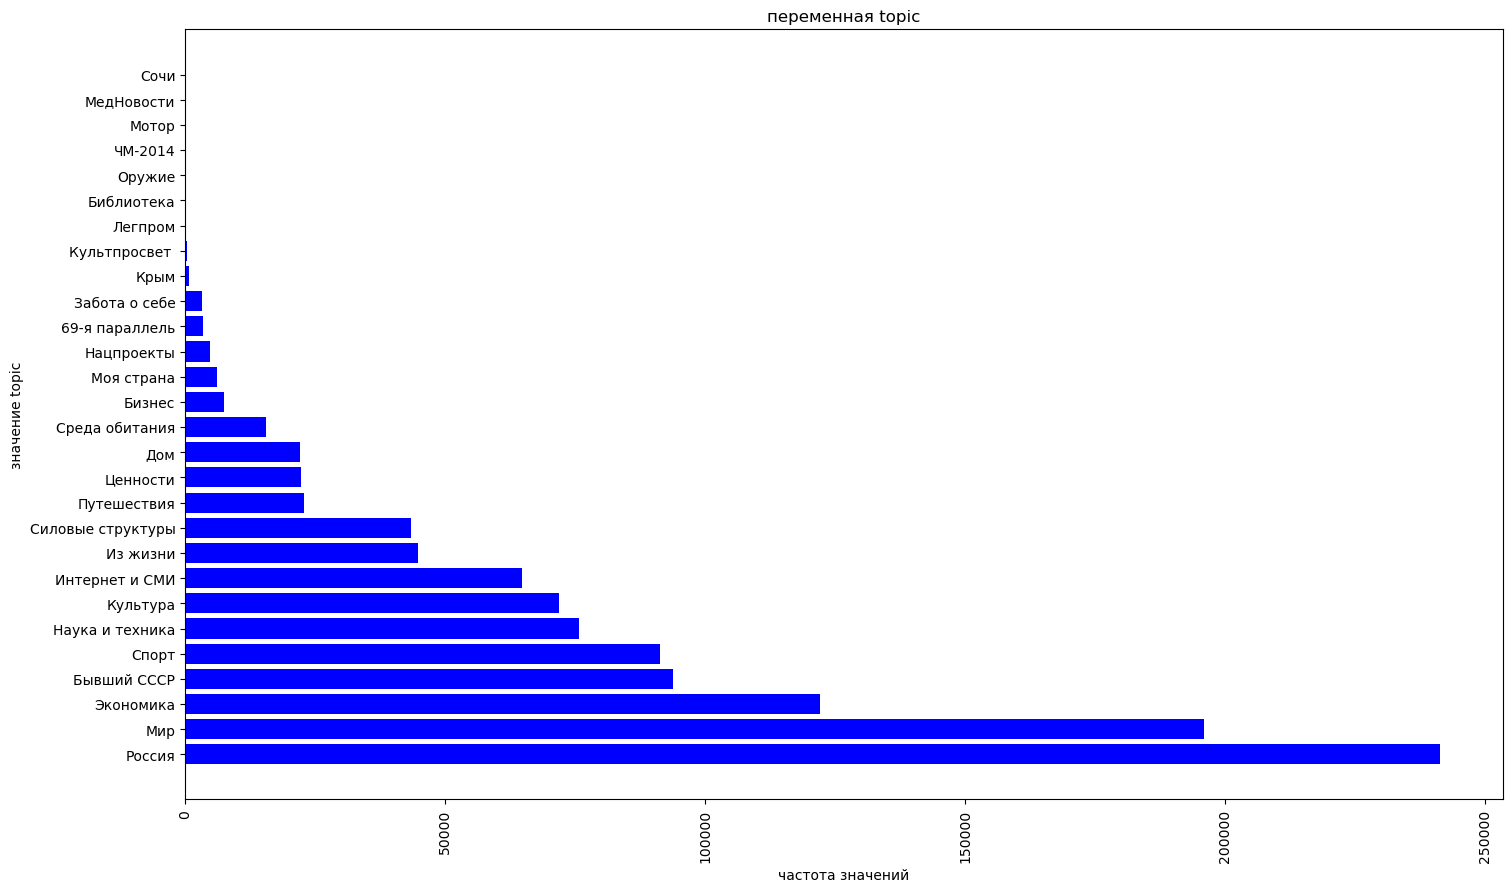

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(17, 10))
ax.barh(graph0_x, graph0_y, color ='b')
ax.set_title('переменная topic')
ax.set_ylabel('значение topic')
ax.set_xlabel('частота значений')
plt.xticks(rotation = 90)

plt.show()

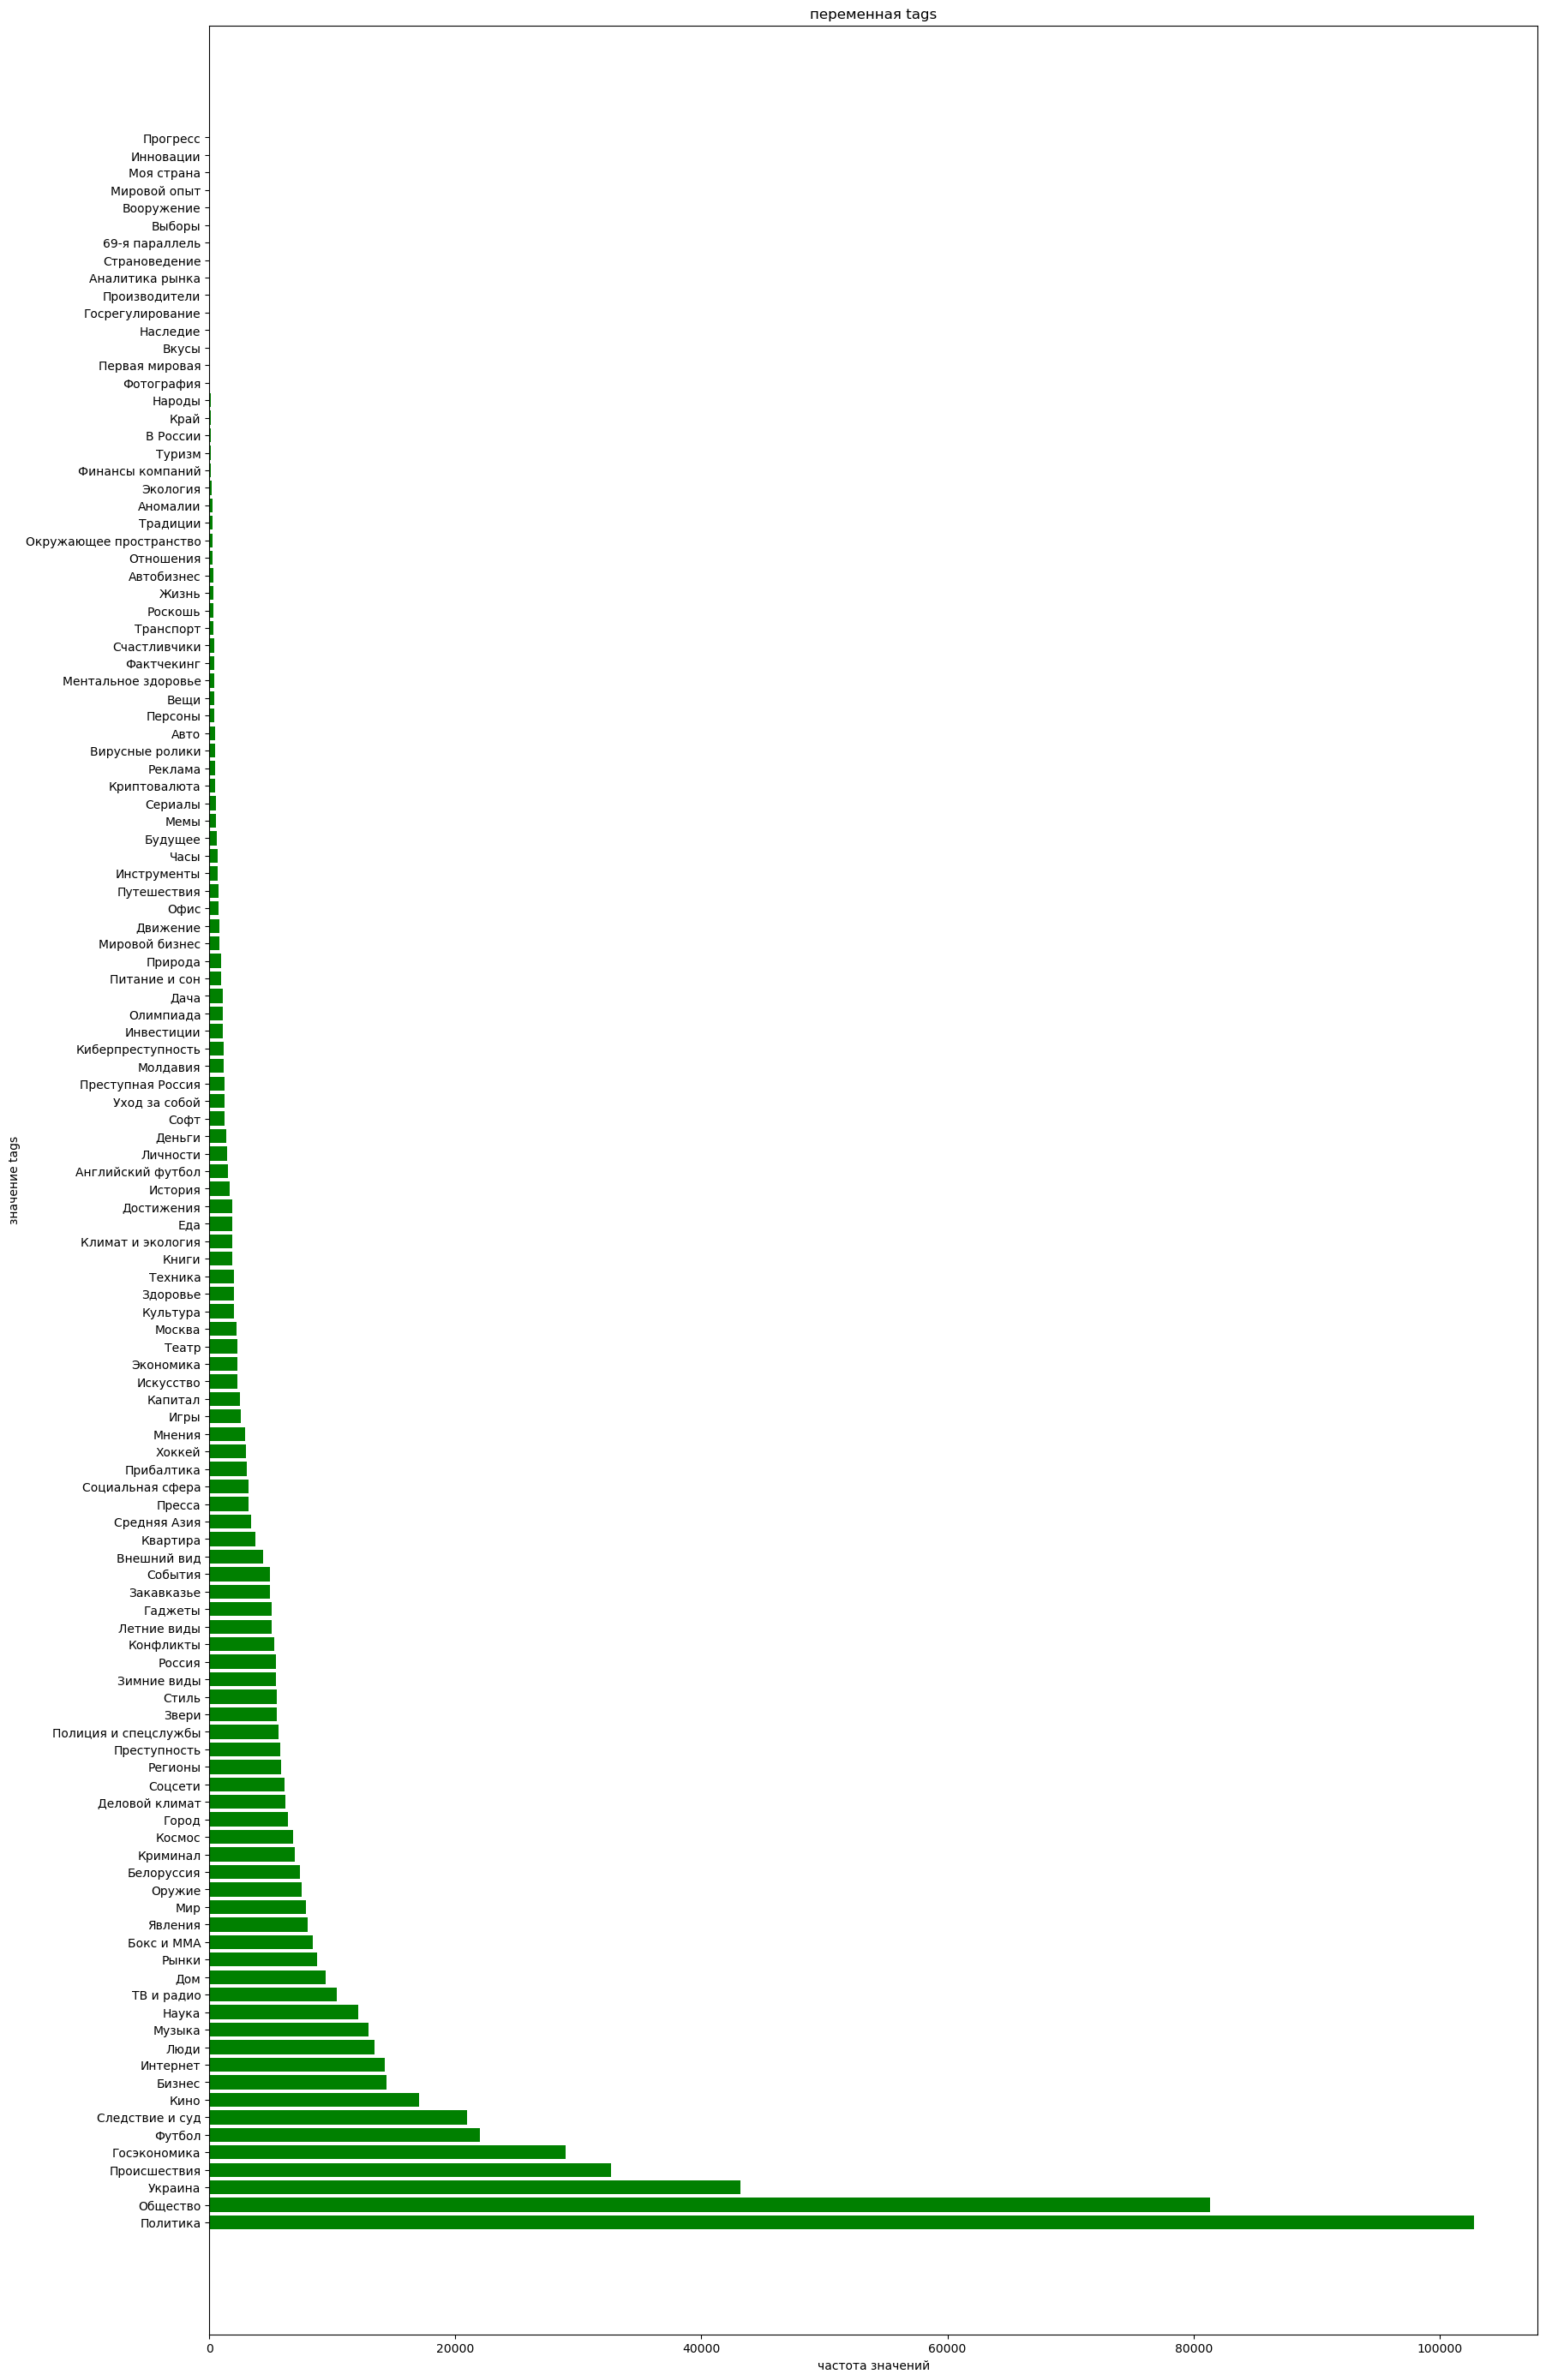

In [20]:
fig, ax = plt.subplots(figsize=(20, 35))
ax.barh(graph1_x, graph1_y, color ='g')
ax.set_title('переменная tags')
ax.set_ylabel('значение tags')
ax.set_xlabel('частота значений')

plt.show()

## Признак date

Как уже упоминалось выше, признак date в изначальном датасете представлен в типе object, поэтому переведем его в тип Datetime

In [21]:
df['date'] = pd.to_datetime(df['date'])

In [22]:
print(f"Дни с {min(df['date'].dt.date)} по {max(df['date'].dt.date)}, всего {df['date'].nunique()} дней.")

Дни с 1914-09-16 по 2022-11-18, всего 8463 дней.


Посмотрим на распределение новостей по годам

In [23]:
df['date'].dt.year.value_counts().sort_index()

1914         5
1999      3078
2000     16172
2001     21972
2002     22179
         ...  
2018     44270
2019     66731
2020     89560
2021    122197
2022    136474
Name: date, Length: 25, dtype: int64

В 1914 новостей очень мало, поэтому новости за 1914 год - выбросы, которые необходимо будет удалить при изучении изменения новостей во времени

Посмотрим на график распределения новостей без 1914 года

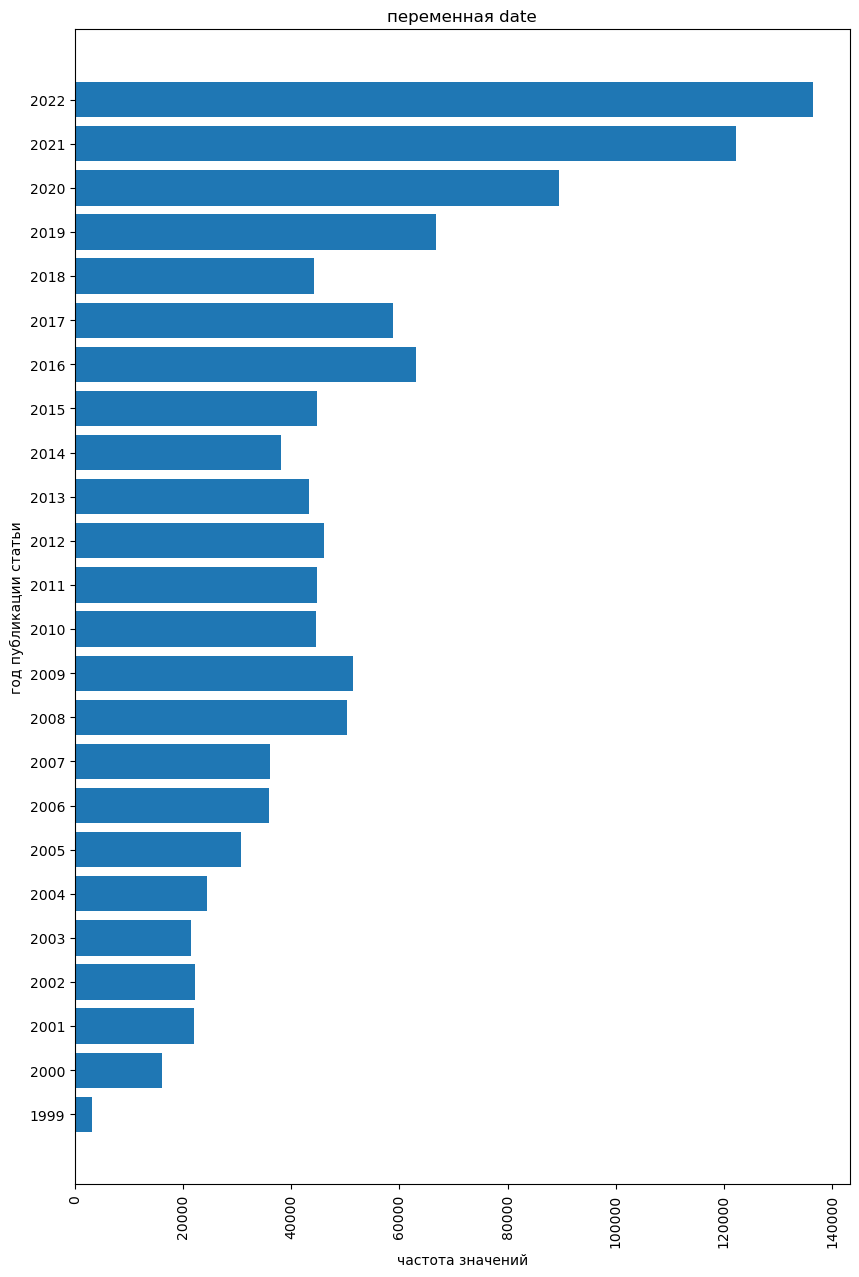

In [24]:
graph2_y = df[df['date'].dt.year != 1914]['date'].dt.year.value_counts().sort_index()
graph2_x = list(graph2_y.index.astype(str))

fig, ax = plt.subplots(1, 1, figsize=(10, 15))
ax.barh(graph2_x, graph2_y)
ax.set_title('переменная date')
ax.set_ylabel('год публикации статьи')
ax.set_xlabel('частота значений')
plt.xticks(rotation = 90)

plt.show()

Проверим, во все ли дни выходили новости в период с 31.08.1999 по 18.11.2022 (выбросные значения 1914г рассматривать не будем).

In [25]:
min(df[df['date'].dt.year != 1914]['date'])

Timestamp('1999-08-31 00:00:00')

In [28]:
missimg_date01 = pd.date_range(start='1999-08-31', end='2022-11-18')
missimg_date = missimg_date01.difference(df['date'])
missimg_date

DatetimeIndex(['1999-09-04', '1999-09-05', '1999-09-11', '1999-09-12',
               '1999-09-19', '1999-09-25', '1999-09-26', '1999-10-02',
               '1999-10-16', '1999-10-23', '1999-10-24', '1999-10-30',
               '1999-11-08', '1999-11-28', '2000-01-07', '2000-01-09',
               '2000-01-23', '2000-01-30', '2000-02-06', '2000-02-13',
               '2000-03-19'],
              dtype='datetime64[ns]', freq=None)

Можно заметить, что есть несколько дат в этом промежутке, которые в датасете не представлены. Даты относятся к 1999 и 2000г году.

## Признак text

In [29]:
print('Максимальная длина текста:', max(df['text'].str.len()))

Максимальная длина текста: 136164.0


In [30]:
print('Минимальная длина текста:', min(df['text'].str.len()))

Минимальная длина текста: 3.0


In [31]:
print('Средняя длина текста:', np.mean(df['text'].str.len()))

Средняя длина текста: 1392.0533664355053


В данных есть странные тексты, состоящие из 3х символов. При обучении моделей они явно будут являться выбросами 

## Признак url

Проверим, что все наши новости действительно с сайта lenta.ru

In [32]:
df['url'].str.startswith('https://lenta.ru/').value_counts()

True    1156518
Name: url, dtype: int64